In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully")


All libraries imported successfully


In [ ]:
from google.colab import files

# Upload CSV file from local machine
uploaded = files.upload()

# Read dataset into DataFrame
df = pd.read_csv("heart.csv")

print("Dataset loaded successfully")
print("Shape:", df.shape)
df.head()

Saving heart.csv to heart (2).csv
Dataset loaded successfully
Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Remove duplicates
df = df.drop_duplicates()

print("Shape after removing duplicates:", df.shape)
print("Number of duplicates removed:", 1025 - df.shape[0])

Shape after removing duplicates: (302, 14)
Number of duplicates removed: 723


In [ ]:
# X contains all input features
X = df.drop("target", axis=1)

# y contains the target labels
y = df["target"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (302, 13)
Target shape: (302,)


In [ ]:
# Split data into training and testing sets
# Stratify ensures class balance is preserved
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Check class distribution after split
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set shape: (241, 13)
Test set shape: (61, 13)

Class distribution in training set:
target
1    0.543568
0    0.456432
Name: proportion, dtype: float64


In [ ]:
# Initialize standard scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

print("Baseline models:")
for name in models:
    print(name)

Baseline models:
Logistic Regression
Decision Tree
Random Forest


In [ ]:
# Dictionaries to store predictions and probabilities
y_preds = {}
y_probas = {}

for name, model in models.items():
    # Train model on training data
    model.fit(X_train_scaled, y_train)

    # Predict class labels on test data
    y_preds[name] = model.predict(X_test_scaled)

    # Predict probabilities for ROC curve
    y_probas[name] = model.predict_proba(X_test_scaled)[:, 1]

    print(f"Trained {name} model")

Trained Logistic Regression model
Trained Decision Tree model
Trained Random Forest model


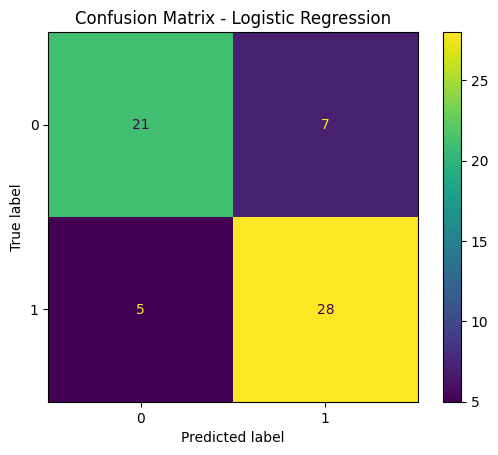

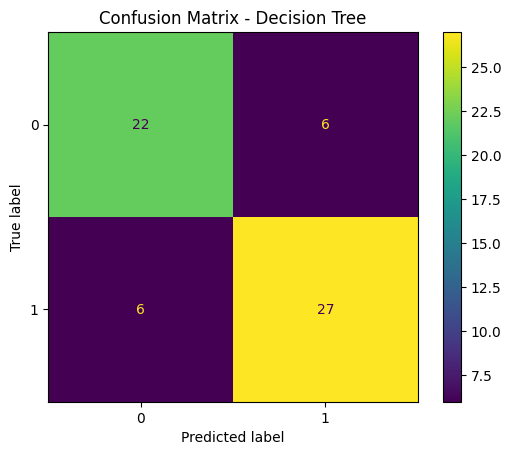

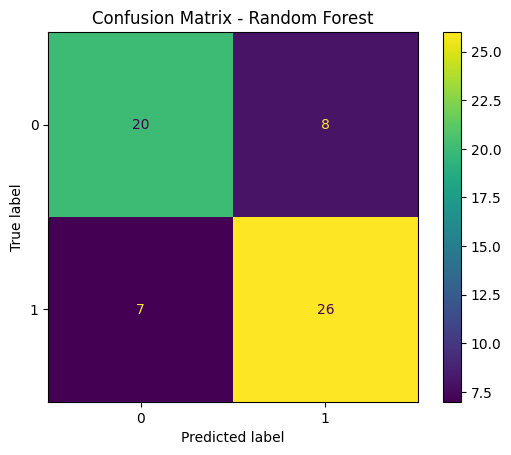

In [ ]:
# Plot confusion matrix for each model
for name in models:
    cm = confusion_matrix(y_test, y_preds[name])

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [ ]:
results = []

for name in models:
    # Compute evaluation metrics
    precision = precision_score(y_test, y_preds[name])
    recall = recall_score(y_test, y_preds[name])
    f1 = f1_score(y_test, y_preds[name])
    auc = roc_auc_score(y_test, y_probas[name])

    # Store results for comparison table
    results.append([name, precision, recall, f1, auc])

    # Print detailed classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_preds[name]))

# Create model comparison table
results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1", "ROC-AUC"]
)

results_df


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro

,Model,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.800000,0.848485,0.823529,0.871212
1,Decision Tree,0.818182,0.818182,0.818182,0.801948
2,Random Forest,0.764706,0.787879,0.776119,0.858766


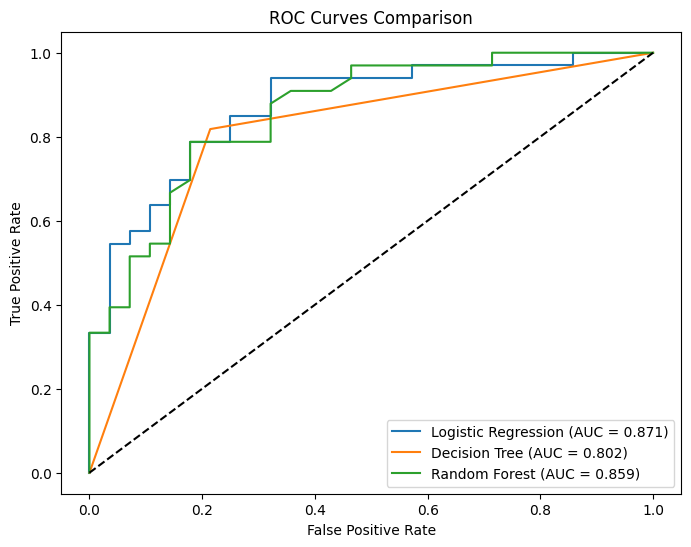

In [ ]:
plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name in models:
    fpr, tpr, _ = roc_curve(y_test, y_probas[name])
    auc = roc_auc_score(y_test, y_probas[name])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Plot random classifier baseline
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearch with F1 scoring
grid = GridSearchCV(
    rf,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

# Fit GridSearch on training data
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated F1 score:", grid.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validated F1 score: 0.8566349808866833



Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



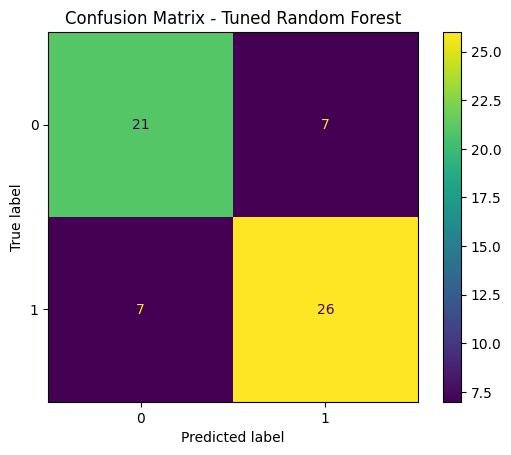

Tuned Random Forest ROC-AUC: 0.8668831168831169


In [ ]:
# Retrieve best model from GridSearch
best_rf = grid.best_estimator_

# Predict with tuned model
y_pred_best = best_rf.predict(X_test_scaled)
y_proba_best = best_rf.predict_proba(X_test_scaled)[:, 1]

# Print classification report for tuned model
print("\nTuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot confusion matrix for tuned model
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

# Compute ROC-AUC for tuned model
auc_best = roc_auc_score(y_test, y_proba_best)
print("Tuned Random Forest ROC-AUC:", auc_best)

In [ ]:
# Add tuned model results to comparison table
results.append([
    "Tuned Random Forest",
    precision_score(y_test, y_pred_best),
    recall_score(y_test, y_pred_best),
    f1_score(y_test, y_pred_best),
    auc_best
])

final_results_df = pd.DataFrame(
    results,
    columns=["Model", "Precision", "Recall", "F1", "ROC-AUC"]
)

final_results_df

,Model,Precision,Recall,F1,ROC-AUC
0,Logistic Regression,0.800000,0.848485,0.823529,0.871212
1,Decision Tree,0.818182,0.818182,0.818182,0.801948
2,Random Forest,0.764706,0.787879,0.776119,0.858766
3,Tuned Random Forest,0.787879,0.787879,0.787879,0.866883
